
# Respuesta a una función sinusoidal

+++

Para una entrada sinusoidal de tipo:

$$f (t) = M U (t) \sin \omega t$$

se obtiene la siguiente respuesta:

$$y (s) = \frac{K_p}{\tau_p s + 1}  \frac{M \omega}{s^2 + \omega^2}$$

que en tiempo real es:

$$y (t) = \frac{K_p M}{1 + \omega^2 \tau_p^2}  \left( \omega \tau_p \mathrm{e}^{-
   \frac{t}{\tau_p}} \cos \omega t + \sin \omega t \right)$$

Aplicando la propiedad trigonométrica:

$$x \sin \alpha + y \cos \alpha = z \sin (\alpha + \varphi)$$

donde $z^2 = x^2 + y^2$ y $\tan \varphi = \frac{y}{x}$, se obtiene:

$$\label{ec:sinusoidal-1} y (t) = \frac{K_p M \omega \tau_p}{1 + \omega^2
  \tau_p^2} \mathrm{e}^{- \frac{t}{\tau_p}} + \frac{K_p M}{\sqrt[]{1 + \omega^2
  \tau_p^2}} \sin (\omega t + \varphi)$$
  
donde $\varphi = \mathrm{atan} (- \omega \tau_p)$.

El primer término de la respuesta es un término transitorio, ya que
tiende a cero cuando el tiempo tiende a infinito. Este término pierde
importancia para tiempos grandes.

La respuesta obtenida es de tipo sinusoidal con la misma frecuencia de
oscilación $\omega$ que la entrada pero con un desfase $\varphi$. Además
el desfase está directamente relacionado con la frecuencia angular. Al
aumentar el desfase, aumenta el desfase.

En el caso de que la frecuencia angular tienda a infinito, el desfase
tiende a $\frac{\pi}{2}$, que es el desfase máximo.

In [1]:
using SymPy, Plots, LaTeXStrings

t, Kp, M, w, Tp = symbols("t K_p M omega, tau_p", real=true)
s = symbols("s")

L(f) = sympy.laplace_transform(f, t, s, noconds=true)
iL(f)  =sympy.inverse_laplace_transform(f, s, t)

f = L(M*sin(w*t))
G = Kp/(Tp*s+1)

y = iL(G*f)

                  ⎛        t                     t          ⎞  -t      
                  ⎜        ──                    ──         ⎟  ───     
     ⎛ 2   2    ⎞ ⎜        τₚ                    τₚ         ⎟   τₚ     
Kₚ⋅M⋅⎝ω ⋅τₚ  + 1⎠⋅⎝- ω⋅τₚ⋅ℯ  ⋅cos(ω⋅t) + ω⋅τₚ + ℯ  ⋅sin(ω⋅t)⎠⋅ℯ   ⋅θ(t)
───────────────────────────────────────────────────────────────────────
                                  2           2                        
                        (ω⋅τₚ - ⅈ) ⋅(ω⋅τₚ + ⅈ)                         

La respuesta obtenida es compleja. Con un poco de esfuerzo se puede simplificar, quizás de manera sorprendente, es una tarea no trivial.

In [2]:
y = sympy.trigsimp(
    collect(
        collect(
            collect(
                expand(
                    cancel(
                        simplify(
                            expand(y)
                            )
                        )
                    ), exp(t/Tp))
            , Kp*M)
        , w^2*Tp^2+1)
)

     ⎛                       -t            ⎞     
     ⎜                       ───           ⎟     
     ⎜                        τₚ           ⎟     
Kₚ⋅M⋅⎝-ω⋅τₚ⋅cos(ω⋅t) + ω⋅τₚ⋅ℯ    + sin(ω⋅t)⎠⋅θ(t)
─────────────────────────────────────────────────
                     2   2                       
                    ω ⋅τₚ  + 1                   

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Respuesta oscilatoria de un sistema de primer orden.
```

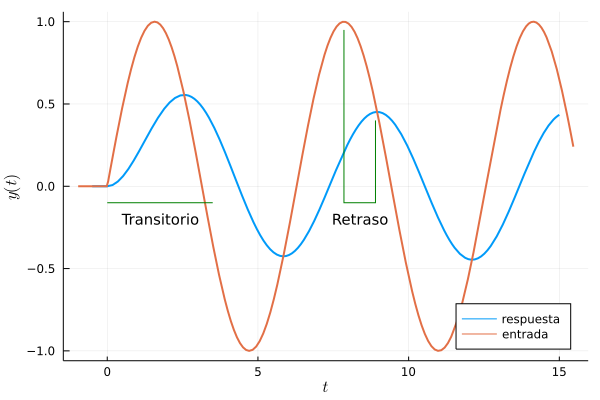

In [3]:
#plotly()
plot(y(Kp=>1, M=>1, Tp=>2, w=>1), -.5, 15, lw = 2,
    xlabel = L"t", ylabel = L"y(t)", label="respuesta", legend = :bottomright)
plot!(sin(t)*Heaviside(t), lw=2, label="entrada")
plot!([5π/2, 5π/2, 8.9, 8.9], [.95, -.1, -.1, .4], color="green", label="")
annotate!(8.4, -.2, Plots.text("Retraso", 10, :center))
plot!([0, 3.5],[-.1, -.1], color="green", label="")
annotate!(3.5/2, -.2, Plots.text("Transitorio", 10, :center))